In [ ]:
pip install stellargraph

In [ ]:
pip install umap-learn

In [ ]:
pip install plot_keras_history

# Loading in the data

We start with loading all the necessary datasets.

In [35]:
import pandas as pd
import numpy as np
import networkx as nx
import io
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# Get connectivity adjacency matrix
Conn_Adj = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/Conn_Adj.csv')
Conn_Adj = Conn_Adj.set_index('Unnamed: 0')

In [6]:
# Get intensity adjacency matrix
Intensity_Adj = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/Intensity_Adj_2.csv')
Intensity_Adj = Intensity_Adj.set_index('Unnamed: 0')

In [7]:
# Create graph from adjacency matrix
G_Conn = nx.from_pandas_adjacency(Conn_Adj)

In [8]:
# Create graph from adjacency matrix
G_int = nx.from_pandas_adjacency(Intensity_Adj)

In [9]:
# Load in feature matrix
df_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/Feature_matrix_v2.csv')
# set index
df_features = df_features.set_index('Unnamed: 0')

In [10]:
df_features.head()

,Degree_centrality,Betweenness_centrality,Closeness_centrality,ego_Density,Heavy_vicinity,Dominant_edge,Unwanted_edges,Missing_edges,Mahalanobis
Unnamed: 0,,,,,,,,,
pete.davis@enron.com,0.001378,0.000003,0.313541,1.584963,2.428122,0.973310,8,0,1.667630
vince.kaminski@enron.com,0.050367,0.025625,0.421937,1.288537,1.317021,0.791028,328,2940,1.288933
To_aol.com,0.005052,0.000674,0.387472,1.413244,1.694394,0.914069,33,0,1.281622
kay.mann@enron.com,0.039651,0.013190,0.388370,1.345474,1.361999,0.716317,258,1522,1.301207
suzanne.adams@enron.com,0.003674,0.000026,0.343193,1.658199,1.470808,0.741919,24,1007,1.391671


In [13]:
# Normalize the features in the dataframe
scaler = StandardScaler()
norm_array = scaler.fit_transform(df_features)

In [14]:
# Create normalized dataframe
normalized_features = pd.DataFrame(norm_array, index=df_features.index, columns=df_features.columns)

In [15]:
normalized_features.head()

,Degree_centrality,Betweenness_centrality,Closeness_centrality,ego_Density,Heavy_vicinity,Dominant_edge,Unwanted_edges,Missing_edges,Mahalanobis
Unnamed: 0,,,,,,,,,
pete.davis@enron.com,-0.175083,-0.122754,-0.023234,0.944222,-0.066462,1.655192,-0.197911,-0.297454,-0.336273
vince.kaminski@enron.com,7.322428,9.183034,2.999796,0.070441,-0.241542,-0.316068,7.316800,5.057410,-0.504942
To_aol.com,0.387231,0.121080,2.038613,0.438043,-0.182078,1.014541,0.389176,-0.297454,-0.508198
kay.mann@enron.com,5.682347,4.666783,2.063670,0.238277,-0.234455,-1.124013,5.672957,2.474690,-0.499475
suzanne.adams@enron.com,0.176363,-0.114236,0.803737,1.160104,-0.217309,-0.847140,0.177824,1.536678,-0.459183


In [16]:
# Read in all addresses from Enron criminals
criminal_addresses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/criminal_addresses.csv')

**Create criminal list**

extract the email addresses belonging to the fraudulent employees.

In [17]:
# Create list containing all criminal addresses
crim_list=[]
for col in criminal_addresses.columns[1:]:
    addresses = criminal_addresses[col][~criminal_addresses[col].isnull()].tolist()
    [crim_list.append(name) for name in addresses if name not in crim_list]

In [18]:
# Create target dataframe
Target_df = pd.DataFrame({'Target': 0}, index=df_features.index)

In [19]:
# 1 to indicate criminal address
Target_df[Target_df.index.isin(crim_list)] = 1

In [20]:
Target_df.value_counts().to_frame().rename(columns={0:'Count within each class'})

,Count within each class
Target,
0,6502
1,31


In [ ]:
crim_list

In [21]:
# create dataframe containing normalized features and target variable
df_all = pd.concat([normalized_features, Target_df], axis=1)

In [22]:
# Split dataset into two seperate dataframes
df_crim = df_all[df_all.Target==1].drop('Target', axis=1)
df_non_crim = df_all[df_all.Target==0].drop('Target', axis=1)

In [23]:
df_crim.describe()

,Degree_centrality,Betweenness_centrality,Closeness_centrality,ego_Density,Heavy_vicinity,Dominant_edge,Unwanted_edges,Missing_edges,Mahalanobis
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.377325,1.230404,1.299551,0.255674,-0.201403,-0.830734,0.980808,0.729218,-0.258354
std,3.600059,5.582269,1.189474,1.185609,0.067322,1.050048,3.542064,2.084242,0.487656
min,-0.362521,-0.123694,-1.344145,-3.727807,-0.252918,-1.953315,-0.362295,-0.297454,-0.580365
25%,-0.139938,-0.113087,0.546819,0.331423,-0.237271,-1.487110,-0.315328,-0.297454,-0.505616
50%,0.363801,-0.084155,1.530375,0.645406,-0.228938,-1.259627,-0.150944,-0.297454,-0.452371
75%,1.242415,0.244452,1.968880,0.773320,-0.188255,-0.415022,0.952779,-0.020604,-0.293187
max,19.341875,31.001670,4.050510,1.143150,0.096045,1.943822,19.363821,7.723914,1.821064


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1385b68f10>,
      dtype=object)

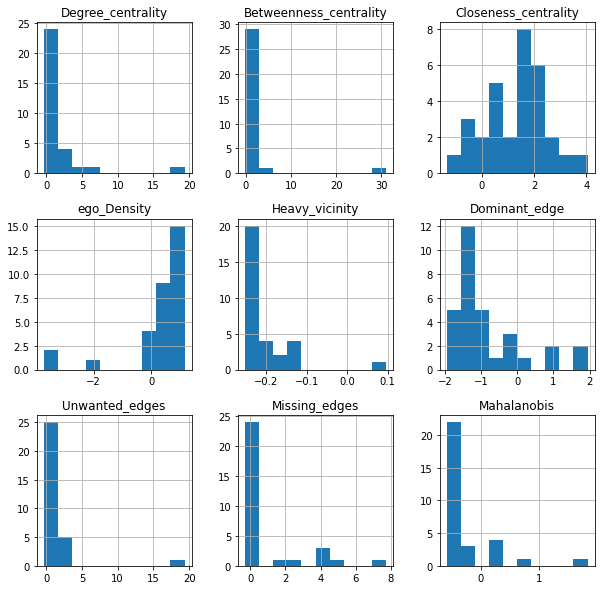

In [24]:
df_crim.hist(figsize=(10,10))

In [25]:
df_non_crim.describe()

,Degree_centrality,Betweenness_centrality,Closeness_centrality,ego_Density,Heavy_vicinity,Dominant_edge,Unwanted_edges,Missing_edges,Mahalanobis
count,6502.000000,6502.000000,6502.000000,6502.000000,6502.000000,6502.000000,6502.000000,6502.000000,6502.000000
mean,-0.006567,-0.005866,-0.006196,-0.001219,0.000960,0.003961,-0.004676,-0.003477,0.001232
std,0.967484,0.924050,0.995139,0.999061,1.002351,0.998262,0.970781,0.991125,1.001751
min,-0.362521,-0.123694,-4.387925,-3.727807,-0.263829,-2.908597,-0.362295,-0.297454,-0.606592
25%,-0.315661,-0.123618,-0.607899,-0.318808,-0.201963,-0.784193,-0.315328,-0.297454,-0.461497
50%,-0.268802,-0.120911,0.019789,0.222353,-0.156382,-0.095242,-0.268361,-0.297454,-0.345085
75%,-0.081364,-0.102218,0.629332,0.653342,-0.062220,0.778386,-0.080494,-0.297454,-0.006718
max,22.083152,39.217404,4.256706,1.476565,37.841331,1.943822,22.111387,10.650875,4.768877


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f177930da50>,
      dtype=object)

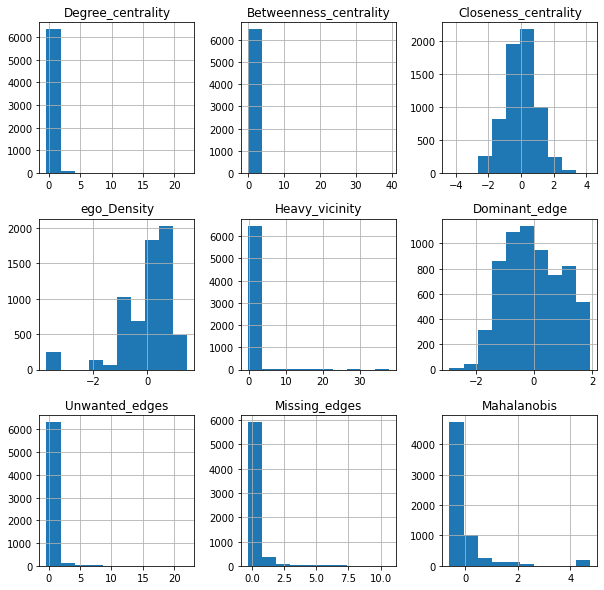

In [26]:
df_non_crim.hist(figsize=(10,10))

# 6. Multivariate normative comparison

Before we use a GCN to detect fraudulent email addresses we use a simpler approach. It calculates the mahalanobis distance between the features of the fraudulent email addresses and the norm (non-fraudulent addresses).

In [27]:
# Calculate the covariance matrix of the the norm
cov_norm = np.cov(df_non_crim, rowvar=False)
# Calculate the averages of the norm features
mean_norm = np.array(df_non_crim.mean(axis=0))
# Number of features
p = df_non_crim.shape[1]
# Number of samples
n = df_non_crim.shape[0]

In [28]:
import scipy
from scipy import stats

In [29]:
# Define F-test function
def f_test_norm_comparison(x, mean_norm, cov_norm, p, n):
    # Calculate f-test
    arr1 = np.dot(np.transpose(mean_norm - x), np.linalg.inv(cov_norm))
    M_dist = np.dot(arr1, (mean_norm - x))
    # Perform scaling
    scaler = (n/(n+1))*((n-p)/((n-1)*p))
    M_dist_scaled = scaler*M_dist
    # calculate p-value of F test statistic
    p_val = 1-scipy.stats.f.cdf(M_dist_scaled, p, (n-p))  
    return M_dist_scaled, p_val

In [30]:
# loop over all criminal addresses
f_scores = list()
p_values = list()
for i in range(df_crim.shape[0]):
  score = f_test_norm_comparison(x=np.array(df_crim)[i], mean_norm=mean_norm, cov_norm=cov_norm, n=n, p=p)
  f_scores.append(score[0])
  p_values.append(score[1])

# Create dataframe
df_multi_comparison = pd.DataFrame({'F_scores' : f_scores, 'P_values': p_values}, index=df_crim.index)

In [31]:
df_multi_comparison[df_multi_comparison.P_values<0.05]

,F_scores,P_values
Unnamed: 0,,
tim.belden@enron.com,2.519531,7.035980e-03
kenneth.lay@enron.com,160.480055,1.110223e-16
david.delainey@enron.com,5.298478,3.115803e-07
jeff.skilling@enron.com,3.879177,6.363786e-05
richard.causey@enron.com,3.847158,7.148362e-05
f..calger@enron.com,2.524536,6.922910e-03
wes.colwell@enron.com,2.857724,2.302033e-03
paula.rieker@enron.com,2.746169,3.343968e-03
rice@enron.com,2.171638,2.107459e-02


If we perform multivariate normative comparison we are able to detect 10 addresses from the 31 criminal addresses. These clearly differ from the norm. To get a better idea of the overall performance of multivariate normative comparison we should perform the technique over all samples.

In [32]:
addresses = normalized_features.index.tolist()

In [33]:
array = np.array(normalized_features.drop(addresses[0]))

In [ ]:
# Create variable
f_scores = list()
p_values = list()

for k in range(len(normalized_features)):
  # Get all addresses from the dataframe
  addresses = normalized_features.index.tolist()
  # Sample to compare with
  comparing_sample = addresses[k]
  # Remove 1 observation from the dataframe
  array = np.array(normalized_features.drop(comparing_sample))
  # Calculate the covariance matrix of the the norm
  cov_norm = np.cov(array, rowvar=False)
  # Calculate the averages of the norm features
  mean_norm = np.array(array.mean(axis=0))
  # Number of features
  p = normalized_features.shape[1]
  # Number of samples
  n = normalized_features.shape[0]

  # loop over all addresses
  score = f_test_norm_comparison(x=np.array(normalized_features.loc[comparing_sample]), mean_norm=mean_norm, cov_norm=cov_norm, n=n, p=p)
  f_scores.append(score[0])
  p_values.append(score[1])

  # follow loop
  print(k)

# Create dataframe
df_multi_comparison_all = pd.DataFrame({'F_scores' : f_scores, 'P_values': p_values}, index=normalized_features.index)

In [36]:
# Create dataframe storing the predictions and the actual values
df_predictions_mc = pd.concat([df_multi_comparison_all.P_values<0.05, Target_df], axis=1).rename(columns={'P_values':'Predictions'})

In [37]:
df_predictions_mc

,Predictions,Target
Unnamed: 0,,
pete.davis@enron.com,False,0
vince.kaminski@enron.com,True,0
To_aol.com,False,0
kay.mann@enron.com,True,0
suzanne.adams@enron.com,False,0
...,...,...
port@enron.com,True,0
e-mail <.pinnamaneni@enron.com>,True,0
e-mail <.maureen@enron.com>,True,0


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

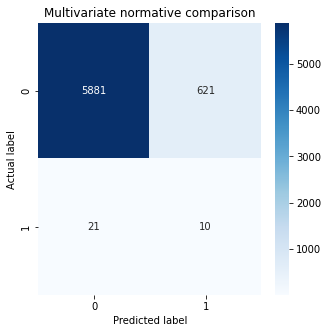

In [40]:
cm = confusion_matrix(df_predictions_mc.Target, df_predictions_mc.Predictions.astype(int))
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Multivariate normative comparison')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/files/Confusion_mat_multivariate.png')

Check the distribution of the features of significantly different cases.

In [ ]:
normalized_features.loc[df_predictions_mc.Predictions==True].describe()

,Degree_centrality,Betweenness_centrality,Closeness_centrality,ego_Density,Heavy_vicinity,Dominant_edge,Unwanted_edges,Missing_edges,Mahalanobis
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,0.941264,0.739586,0.145347,-0.871730,0.703104,0.343559,1.073285,1.329571,1.337493
std,2.777421,3.085246,1.504434,1.709390,3.024504,1.354012,2.768082,2.524227,2.420400
min,-0.362521,-0.123694,-4.387925,-3.727807,-0.258626,-2.640871,-0.362295,-0.297454,-0.597460
25%,-0.362521,-0.123694,-0.640750,-1.629897,-0.219816,-1.004959,-0.362295,-0.297454,-0.505716
50%,-0.315661,-0.119499,-0.080777,-0.128843,-0.104820,0.559994,-0.291845,-0.297454,-0.367175
75%,0.855825,0.135284,1.246484,0.489430,0.421298,1.638102,1.645541,3.208707,4.768877
max,22.083152,39.217404,4.256706,1.200637,37.841331,1.943822,22.111387,10.650875,4.768877


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f785b395d10>,
      dtype=object)

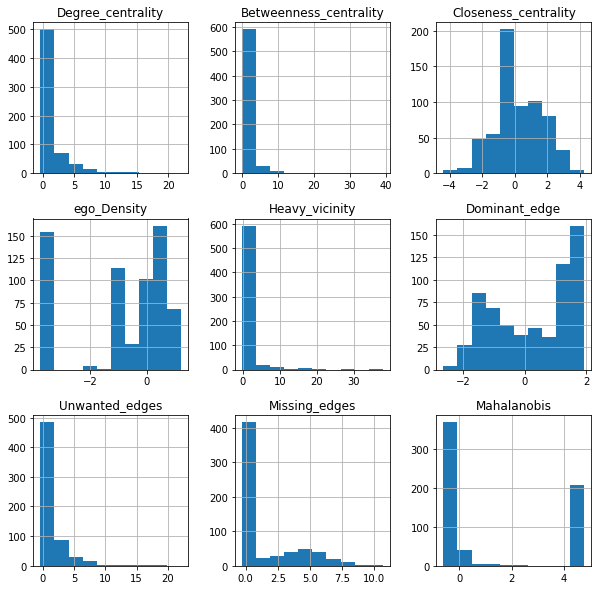

In [220]:
normalized_features.loc[df_predictions_mc.Predictions==True].hist(figsize=(10,10))

In [221]:
normalized_features.loc[df_predictions_mc.Predictions==False].describe()

,Degree_centrality,Betweenness_centrality,Closeness_centrality,ego_Density,Heavy_vicinity,Dominant_edge,Unwanted_edges,Missing_edges,Mahalanobis
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,-0.100633,-0.079071,-0.015539,0.093199,-0.075171,-0.036731,-0.114748,-0.142148,-0.142995
std,0.422691,0.161621,0.928959,0.839760,0.268277,0.947311,0.390789,0.466484,0.519535
min,-0.362521,-0.123694,-2.822429,-3.727807,-0.263829,-2.908597,-0.362295,-0.297454,-0.606592
25%,-0.315661,-0.123565,-0.603785,-0.305607,-0.201136,-0.775358,-0.315328,-0.297454,-0.455325
50%,-0.268802,-0.120902,0.021273,0.274315,-0.159095,-0.121421,-0.268361,-0.297454,-0.345071
75%,-0.081364,-0.104219,0.596848,0.663993,-0.076765,0.685312,-0.103977,-0.297454,-0.057557
max,3.292516,3.356391,2.880166,1.476565,3.017551,1.943822,3.277643,3.374453,2.151495


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f785a9ce190>,
      dtype=object)

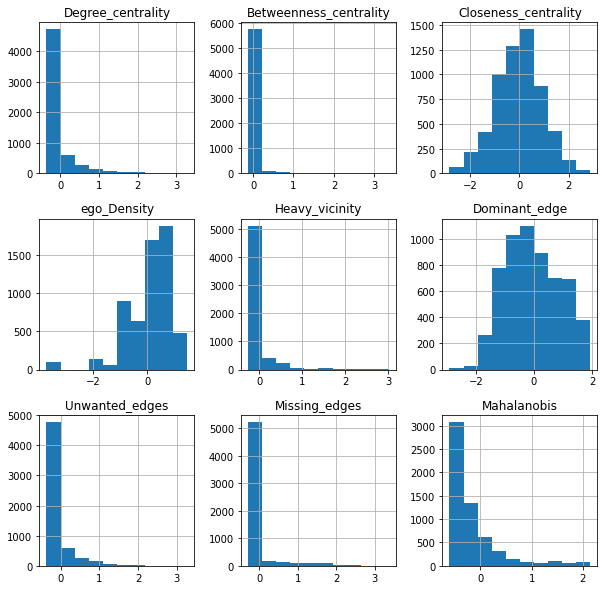

In [222]:
normalized_features.loc[df_predictions_mc.Predictions==False].hist(figsize=(10,10))

Next, we will perform a t-test and test for effectsizes for the different features between the different groups.

In [46]:
def t_test(feature):
  x1 = df_non_crim[feature]
  x2 = df_crim[feature]
  mean_difference = np.mean(x1) - np.mean(x2)
  pooled_variance = (((len(x1)-1)*np.var(x1)) + ((len(x2)-1)*np.var(x2)))/(len(x1)+len(x2)-2)
  t_stat = mean_difference/(pooled_variance*np.sqrt((1/len(x1))+(1/len(x2))))

  return t_stat

In [47]:
t_test('Degree_centrality')

-7.770844258227594

In [48]:
from scipy import stats

In [49]:
t_stat = []
t_test_p_val = []

# Loop
for feature in df_non_crim.columns.tolist():
  stat = stats.ttest_ind(df_non_crim[feature],df_crim[feature])[0]
  t_p_val = stats.ttest_ind(df_non_crim[feature],df_crim[feature])[1]
  t_stat.append(stat)
  t_test_p_val.append(t_p_val)

Finally, we will calculate the effect sizes.

In [50]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [51]:
Effect_sizes = []

# Loop
for feature in df_non_crim.columns.tolist():
  d = cohend(df_non_crim[feature], df_crim[feature])
  Effect_sizes.append(d)

In [52]:
group_comparison = pd.DataFrame({'T_statistic':t_stat, 'P_value':t_test_p_val, 'Effect_size':Effect_sizes}, index=df_non_crim.columns)

In [53]:
group_comparison

,T_statistic,P_value,Effect_size
Degree_centrality,-7.720699,1.330392e-14,-1.389980
Betweenness_centrality,-6.890776,6.068274e-12,-1.240567
Closeness_centrality,-7.281086,3.700219e-13,-1.310835
ego_Density,-1.426928,1.536484e-01,-0.256894
Heavy_vicinity,1.123971,2.610667e-01,0.202352
Dominant_edge,4.643279,3.496322e-06,0.835943
Unwanted_edges,-5.485665,4.273678e-08,-0.987601
Missing_edges,-4.074325,4.669453e-05,-0.733513
Mahalanobis,1.441885,1.493827e-01,0.259587


# 7. Graph convolutional network

In the final step of the process we combine our feature matrix, created in section 5 with our created graphs built in section 3 and 4. We will use a graph convolutional network to combine the strength of convulational networks with message passing in graphs to try to detect fraudulent email addresses. 

Convolutional networks give us the advantage to gather information from its neighbours. In the context of a graph this can be seen as message passing.

**Building the network**

In [40]:
import os

import stellargraph
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN
from stellargraph.core.graph import StellarGraph

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection

In the first few lines of code we start with transforming our graph to a graph that can be read by the stellargraph package

In [ ]:
# Make a copy of the original graph
g = G_Conn.copy()

In [ ]:
# Make a copy of the original graph
g_weight = G_int.copy()

In [ ]:
# Create graph
UnWeighted_network = StellarGraph.from_networkx(
    g, node_features=normalized_features
)

In [ ]:
# Create graph
Weighted_network = StellarGraph.from_networkx(
    g_weight, node_features=normalized_features
)

In [ ]:
# Print out the info
print(UnWeighted_network.info())

StellarGraph: Undirected multigraph
 Nodes: 6533, Edges: 53808

 Node types:
  default: [6533]
    Features: float32 vector, length 9
    Edge types: default-default->default

 Edge types:
    default-default->default: [53808]
        Weights: all 1 (default)
        Features: none


In [ ]:
# Print out the info
print(Weighted_network.info())

StellarGraph: Undirected multigraph
 Nodes: 6533, Edges: 53808

 Node types:
  default: [6533]
    Features: float32 vector, length 9
    Edge types: default-default->default

 Edge types:
    default-default->default: [53808]
        Weights: range=[2, 2413], mean=12.0481, std=34.2435
        Features: none


In the next steps we will split the data into a train, test and validation set.

In [ ]:
# Compute train, validation and test dataset
train_subjects, test_subjects = model_selection.train_test_split(
    Target_df, train_size=2000, test_size=None, stratify=Target_df
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_subjects, train_size=2500, test_size=None, stratify=test_subjects
)

No that we have split the data into a train, validation and test set we will take a closer look into which individuals and how many are part of each set.

In [ ]:
train_subjects.value_counts()

Target
0         1991
1            9
dtype: int64

In [ ]:
train_subjects[train_subjects.Target==1].index.tolist()

['jeff.richter@enron.com',
 'hannon@enron.com',
 'wes.colwell@enron.com',
 'ken.rice@enron.com',
 'rice@enron.com',
 'larry.lawyer@enron.com',
 'paula.rieker@enron.com',
 'ben.glisan@enron.com',
 'andrew.fastow@enron.com']

In [ ]:
val_subjects.value_counts()

Target
0         2488
1           12
dtype: int64

In [ ]:
val_subjects[val_subjects.Target==1].index.tolist()

['raymond.bowen@enron.com',
 'dan.boyle@enron.com',
 'david.delainey@enron.com',
 'belden@enron.com',
 'chairman.ken@enron.com',
 'jskilli@enron.com',
 'richard.causey@enron.com',
 'f..calger@enron.com',
 'a..howard@enron.com',
 'rex.shelby@enron.com',
 'mark.koenig@enron.com',
 'kevin.hannon@enron.com']

In [ ]:
test_subjects.value_counts()

Target
0         2023
1           10
dtype: int64

In [ ]:
test_subjects[test_subjects.Target==1].index.tolist()

['w..delainey@enron.com',
 'm..forney@enron.com',
 'tim.belden@enron.com',
 'christopher.calger@enron.com',
 'kenneth.lay@enron.com',
 'jeff.skilling@enron.com',
 'john.forney@enron.com',
 'tim.despain@enron.com',
 'calger@enron.com',
 'michael.krautz@enron.com']

GCN is a full-batch model and we’re doing node classification, which means the FullBatchNodeGenerator class (docs) is the appropriate generator for our task

Specifying the method='gcn' argument to the FullBatchNodeGenerator means it will yield data appropriate for the GCN algorithm specifically, by computing the feature array and the normalized adjacency matrix. 

In [ ]:
# Initialize generator
generator = FullBatchNodeGenerator(UnWeighted_network, method="gcn")

Using GCN (local pooling) filters...


Now we created a generator necessary to produce the input variables for our gcn model we use the flow argument to apply our generator on our training data.

In [ ]:
train_gen = generator.flow(train_subjects.index, train_subjects.Target.values)

Here we create our GCN.

we have 2 layers each consisting of 16 units. We use the 'ReLu' activation for both layers and a dropout rate of 0.5 

In [ ]:
gcn = GCN(
    layer_sizes=[32, 32],
    activations=["relu", "relu"],
    generator=generator,
    dropout=0.5
)

We use the in_out_function to create the input formats for our gcn and the output formats for node classification
* x_inp is a list of Keras/TensorFlow input tensors for the GCN model
* x_out is a tensor of the GCN model output

In [ ]:
# Create in and output tensors
x_inp, x_out = gcn.in_out_tensors()

x_out

<KerasTensor: shape=(1, None, 32) dtype=float32 (created by layer 'gather_indices')>

In [ ]:
x_inp

[<KerasTensor: shape=(1, 6533, 9) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(1, None) dtype=int32 (created by layer 'input_2')>,
 <KerasTensor: shape=(1, None, 2) dtype=int64 (created by layer 'input_3')>,
 <KerasTensor: shape=(1, None) dtype=float32 (created by layer 'input_4')>]

We create an extra dense layer necessary for our predictions. As we only have 2 classes we will use the sigmoid activation function.

In [ ]:
# Create layer for predictions
predictions = layers.Dense(units=train_subjects.shape[1], activation="sigmoid")(x_out)

To create our model we use our x_inp which consists out of our gcn layers followed by our dense layer used to make predictions.

In [ ]:
# Define some more metrics
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
# Compile the model
model = Model(inputs=x_inp, outputs=predictions)

In [ ]:
model.compile(
    optimizer=optimizers.Adam(lr=0.005),
    loss=losses.binary_crossentropy,
    metrics=METRICS,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 6533, 9)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(1, None, 2)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(1, None)]          0           []                               
                                                                                                  
 dropout (Dropout)              (1, 6533, 9)         0           ['input_1[0][0]']                
                                                                                              

Next we apply the generator on our validation data.

In [ ]:
val_gen = generator.flow(val_subjects.index, val_subjects.Target.values)

Here we initiate an early stopping mechanism.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)

In [ ]:
# Fit the model
history = model.fit(
    train_gen,
    epochs=200,
    validation_data=val_gen,
    verbose=2,
    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
    # callbacks=[es_callback],
)

Epoch 1/200
1/1 - 10s - loss: 0.5940 - tp: 1.0000 - fp: 38.0000 - tn: 1953.0000 - fn: 8.0000 - accuracy: 0.9770 - precision: 0.0256 - recall: 0.1111 - auc: 0.2526 - prc: 0.1136 - val_loss: 0.5527 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 2488.0000 - val_fn: 12.0000 - val_accuracy: 0.9952 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.1459 - val_prc: 0.0026 - 10s/epoch - 10s/step
Epoch 2/200
1/1 - 0s - loss: 0.5368 - tp: 0.0000e+00 - fp: 2.0000 - tn: 1989.0000 - fn: 9.0000 - accuracy: 0.9945 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.2157 - prc: 0.0026 - val_loss: 0.5043 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 2488.0000 - val_fn: 12.0000 - val_accuracy: 0.9952 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.1438 - val_prc: 0.0026 - 244ms/epoch - 244ms/step
Epoch 3/200
1/1 - 0s - loss: 0.4929 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1991.0000 - fn: 9.0000 - accuracy: 0.9955 - precision: 0.0000e+00 - recall: 0.0000e+00 -

In [ ]:
from plot_keras_history import plot_history, show_history

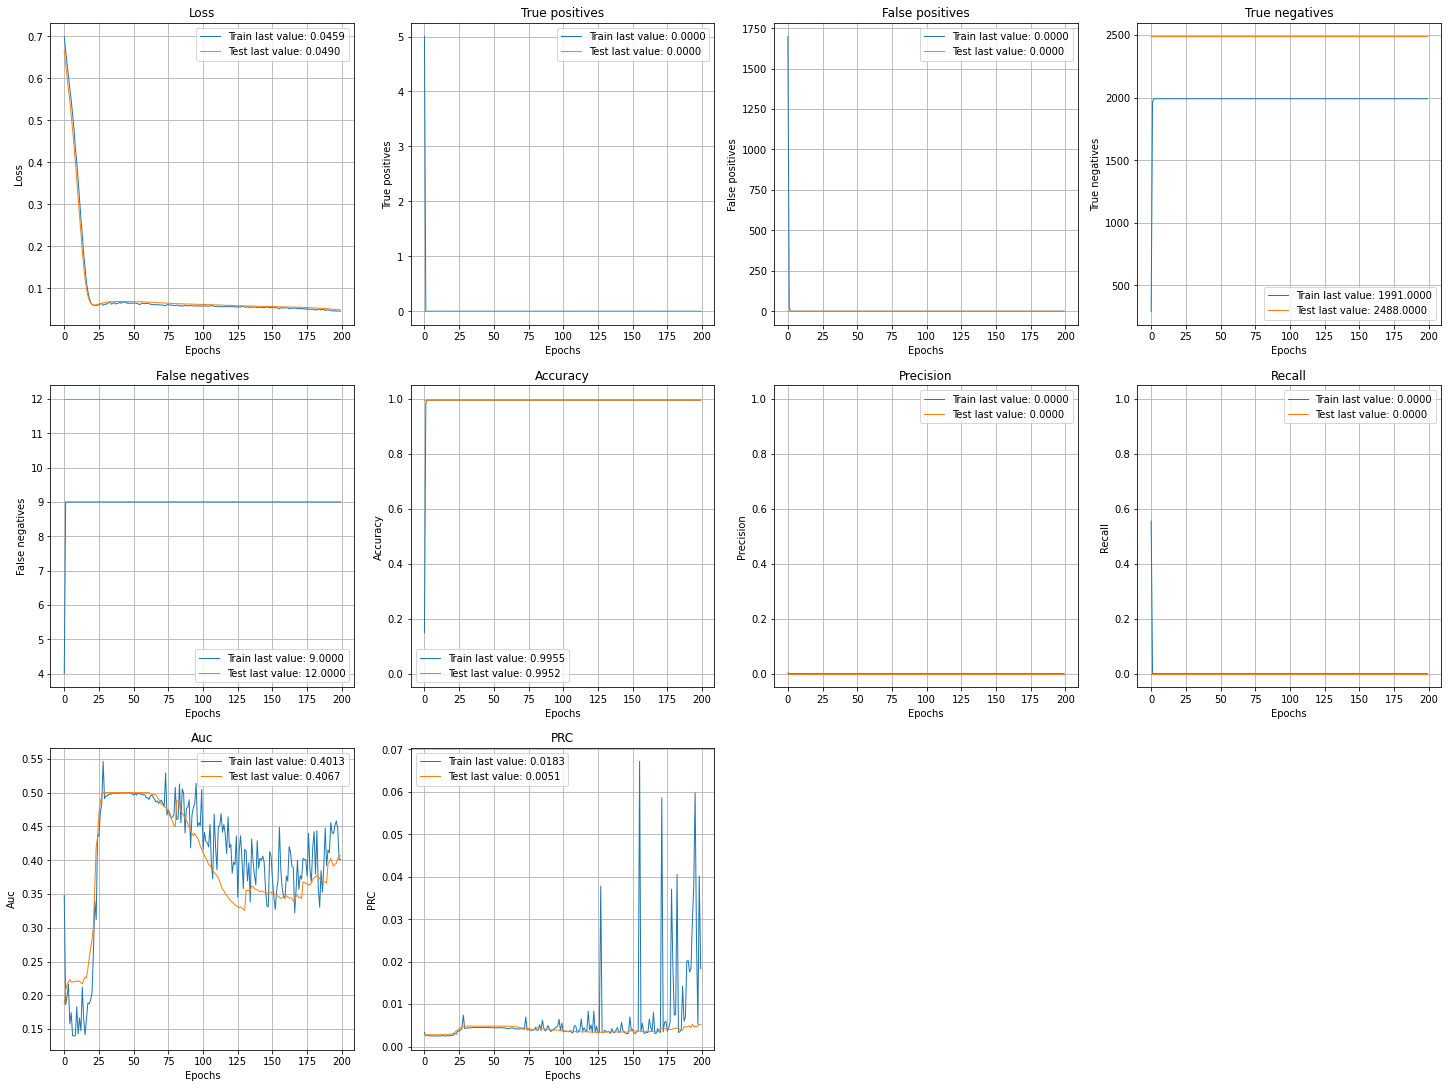

In [ ]:
show_history(history)

In the next few code segments we create additional vizualisations for the accuracy, loss and AUC.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


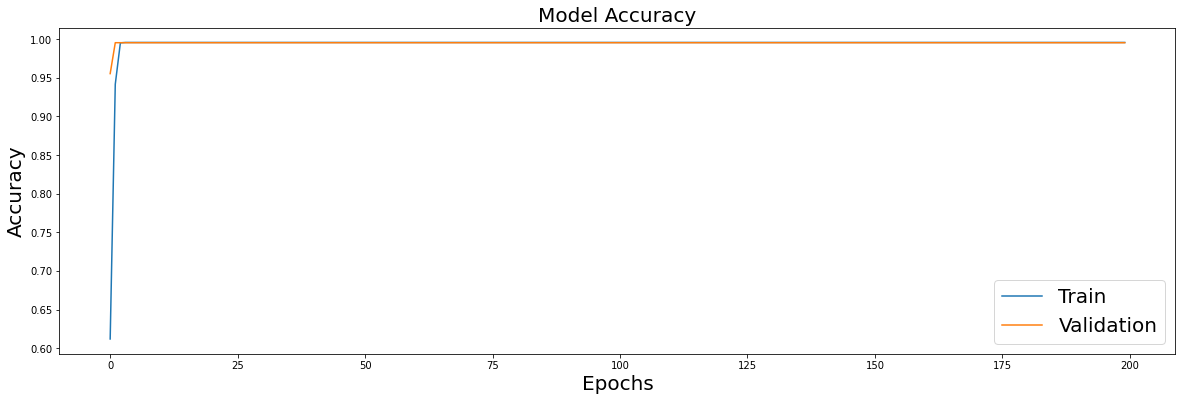

In [ ]:
# set size plot
plt.rcParams["figure.figsize"] = (20,6)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.legend(['Train', 'Validation'], loc='bottom right', fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/files/Acc_model.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


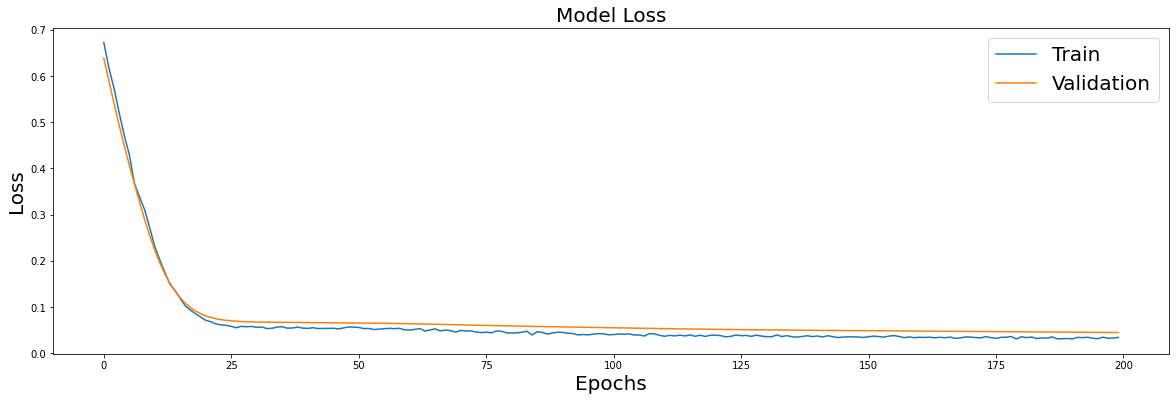

In [ ]:
# set size plot
plt.rcParams["figure.figsize"] = (20,6)

# summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.legend(['Train', 'Validation'], loc='bottom right', fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/files/Loss_model.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


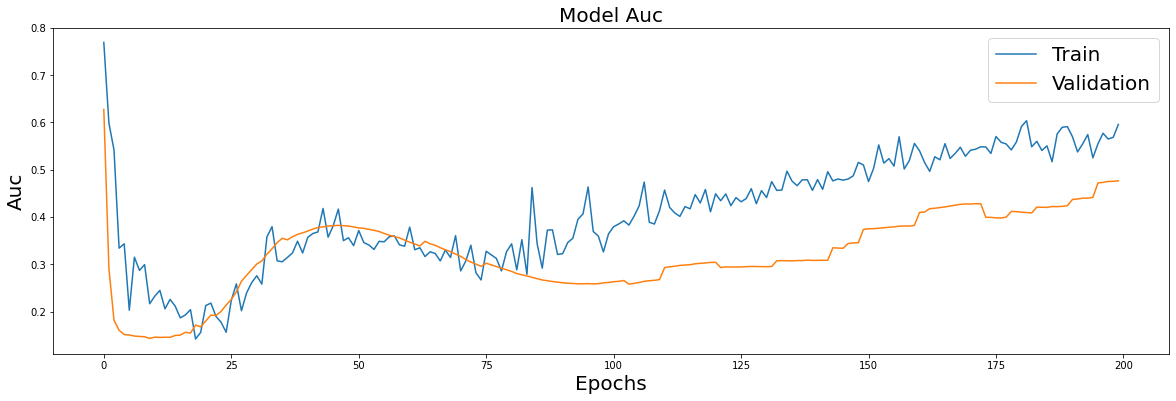

In [ ]:
# set size plot
plt.rcParams["figure.figsize"] = (20,6)

# summarize history for AUC
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model Auc', fontsize=20)
plt.ylabel('Auc', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.legend(['Train', 'Validation'], loc='bottom right', fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/files/AUC_model.png')
plt.show()

In this section we will predict the test set. First we use our generator to convert our test subject and their features to the correct input. Here we also convert our sigmoid output to 0 and 1.

In [ ]:
test_gen = generator.flow(test_subjects.index, test_subjects.Target.values)

In [ ]:
Test_predictions = model.predict(test_gen)

In [ ]:
test_node_predictions = np.array(Test_predictions.squeeze()>=0.5).astype(int)

In [ ]:
df_predictions = pd.DataFrame({'Predicted': test_node_predictions, 'True': test_subjects.Target})

In [ ]:
import sklearn

In [ ]:
classification = sklearn.metrics.classification_report(df_predictions['True'], df_predictions['Predicted'])
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2023
           1       0.00      0.00      0.00        10

    accuracy                           1.00      2033
   macro avg       0.50      0.50      0.50      2033
weighted avg       0.99      1.00      0.99      2033



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


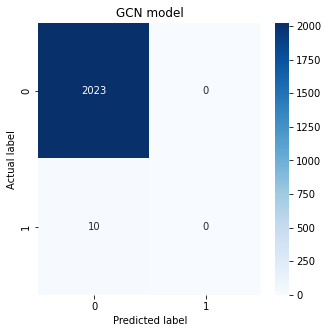

In [ ]:
  cm = confusion_matrix(df_predictions['True'], df_predictions['Predicted'])
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title('GCN model')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/files/Confusion_mat_test_set.png')

Let us have a look at the embeddings of the model before we proceed to the final dense. These embeddings show how the data is represented

In [ ]:
import umap
import seaborn as sns

(1, 6533, 32)


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


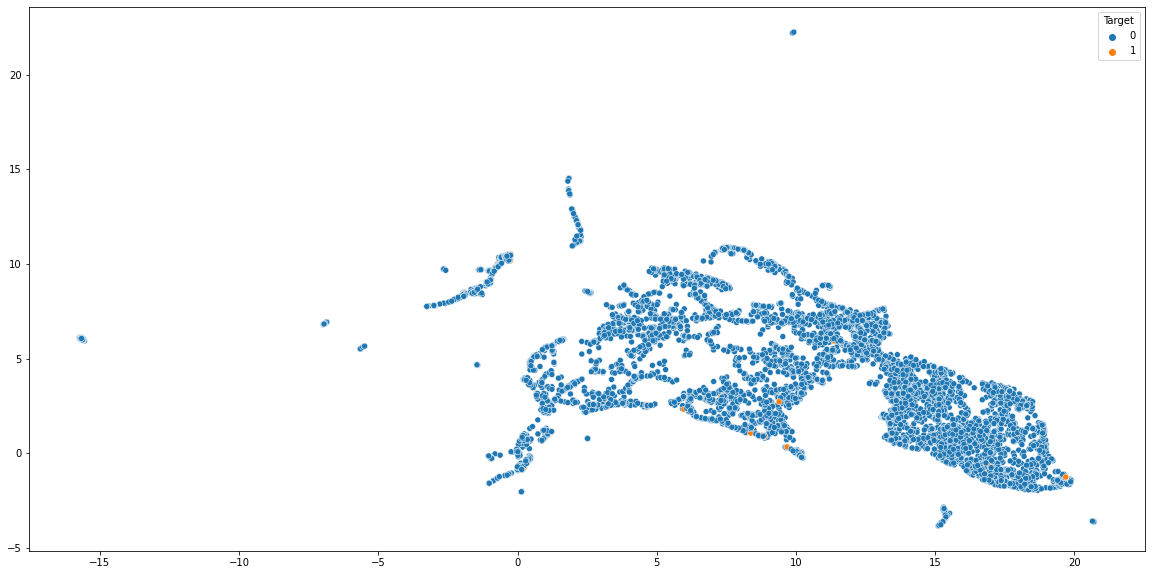

In [ ]:
# Define the embedding model
embedding_model = Model(inputs=x_inp, outputs=model.layers[-2].output)

# Get indices of all nodes
all_indices = Target_df.index

# Use generator on entire dataset
all_nodes_gen = generator.flow(Target_df.index, Target_df.Target.values)

# Get embeddings
emb = embedding_model.predict(all_nodes_gen)
print(emb.shape)
# Shape: (1, 37700, 32)

# UMAP for visualisation
u = umap.UMAP(random_state=42)
umap_embs = u.fit_transform(emb[0])

#Plot the embeddings
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x = umap_embs[:, 0], y = umap_embs[:, 1], hue = Target_df.Target)

# Save plot
plt.savefig('/content/drive/MyDrive/Colab Notebooks/files/Embeddings_plot.png')

# 8. Feature importance

To get a better understanding why the GCN model is unable to differentiate between the fraudulent and non-fraudulent addresses we be looking at different measures of feature importance. 

We start by performing a logistic regression to analyze the coefficients of the features.

### Coefficients logistic regression


In [29]:
import statsmodels.api as sm

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, Target_df.Target)

In [44]:
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.692605
         Iterations 4


In [45]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 4899
Model:                          Logit   Df Residuals:                     4890
Method:                           MLE   Df Model:                            8
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                  -19.93
Time:                        15:15:27   Log-Likelihood:                -3393.1
converged:                       True   LL-Null:                       -162.14
Covariance Type:            nonrobust   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Degree_centrality          0.0148      0.060      0.247      0.805      -0.103       0.132
Betweenness_centrality     0.0098      0.056      0.177      0.860      -0.099       0.119
Clos

If we look at the coefficients and the corresponding p-values of the features we see that none of the features have a significant effect on the Target variable. The logit model relies on a linear relation between the dependent and independent variable. 

Next, we will use a random forest classifier to account for non-linear relations.

### Feature importance Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf_model = RandomForestClassifier()

In [32]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
rf_feature_importance = pd.DataFrame({'Features':normalized_features.columns, 'Importance':rf_model.feature_importances_, 'Standard_Error': np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)})

In [34]:
rf_feature_importance.sort_values(by='Importance')

,Features,Importance,Standard_Error
7,Missing_edges,0.036269,0.046813
0,Degree_centrality,0.064144,0.056907
6,Unwanted_edges,0.071336,0.057652
3,ego_Density,0.092123,0.059915
1,Betweenness_centrality,0.127548,0.077456
8,Mahalanobis,0.132307,0.074545
5,Dominant_edge,0.139353,0.077165
4,Heavy_vicinity,0.156331,0.074932
2,Closeness_centrality,0.180589,0.088825


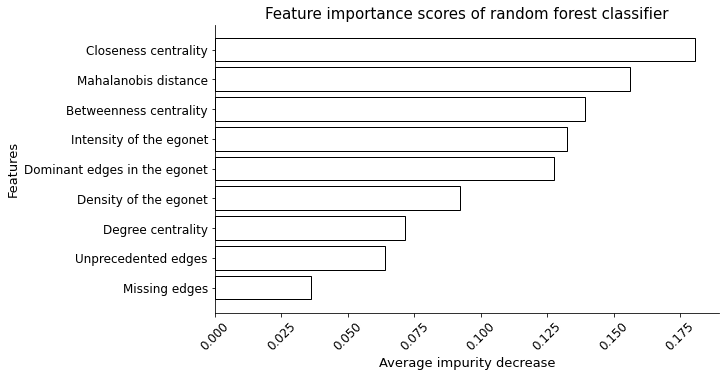

<Figure size 432x288 with 0 Axes>

In [36]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])
features = ['Missing edges', 'Unprecedented edges', 'Degree centrality', 'Density of the egonet', 'Dominant edges in the egonet', 'Intensity of the egonet', 'Betweenness centrality', 'Mahalanobis distance', 'Closeness centrality']
scores = rf_feature_importance.Importance.sort_values().tolist()
ax.barh(features,scores, fill=False)

# Set title
ax.set_title('Feature importance scores of random forest classifier', size=15)

# set labels
ax.set_xlabel('Average impurity decrease', size=13)
ax.set_ylabel('Features', size=13)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/files/Feature_importance_plot.png')